# Test `salinity_ferry_track` Module

Render figure objects produced by the `nowcast.figures.comparison.salinity_ferry_track` module.
Provides data for visual testing to confirm that refactoring has not adversely changed figure for web page.

Set-up and function call replicates as nearly as possible what is done in the `nowcast.workers.make_plots` worker.

Notebooks like this should be developed in a
[Nowcast Figures Development Environment](https://salishsea-nowcast.readthedocs.io/en/latest/figures/fig_dev_env.html)
so that all of the necessary dependency packages are installed.
The development has to be done on a workstation that has the Salish Sea Nowcast system `/results/` parition mounted.

In [1]:
import io
from pathlib import Path

import arrow
import yaml

from salishsea_tools import nc_tools

from nowcast.figures.comparison import salinity_ferry_track

In [2]:
%matplotlib inline

This figure module needs to access the ONC web services API.
Doing so requires a user token which you can generate on the Web Services API tab of your
[ONC account profile page](http://dmas.uvic.ca/Profile).
The `_prep_plot_data()` function assumes that the token will be stored in an environment variable
named `ONC_USER_TOKEN`.
You can do that using a cell like the following,
but **be careful not to commit the notebook with your token in the cell**
or you will publish it to the world in this notebook.

In [5]:
import os
os.environ['ONC_USER_TOKEN'] = 'my-token'

In [10]:
# Relevant part of config from nowcast.yaml file
config = '''
    bathymetry: /SalishSeaCast/grid/c9575e02-bd27-4b77-b6d1-a98baa458624
    coastline: /ocean/rich/more/mmapbase/bcgeo/PNW.mat
    
    observations:
        ferry data': /ocean/jieliu/research/meopar/ONC_ferries/
    
    run:
        results_archive:
            nowcast-green: /results2/SalishSea/nowcast-green.201806/
'''

config = yaml.load(io.StringIO(config))

In [12]:
run_date = arrow.get('2016-03-23')
run_type = 'nowcast-green'
dmy = run_date.format('DDMMMYY').lower()

results_home = Path(config['run']['results_archive'][run_type])
results_dir = results_home/dmy

In [13]:
grid_T_hr = nc_tools.dataset_from_path(
    results_dir/'SalishSea_1h_{0}_{0}_grid_T.nc'.format(run_date.format('YYYYMMDD')))

1 loop, best of 1: 207 ms per loop


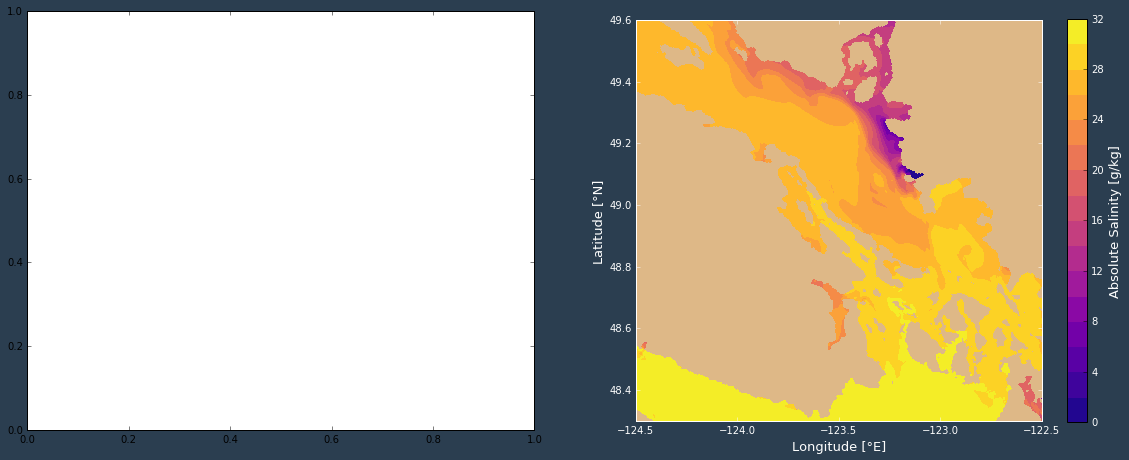

In [50]:
%%timeit -n1 -r1

# Reference rendering of figure

fig = salinity_ferry_track.salinity_ferry_track(grid_T_hr)

/media/doug/warehouse/conda_envs/nowcast-fig-dev-mpl-3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:688: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


1.19 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


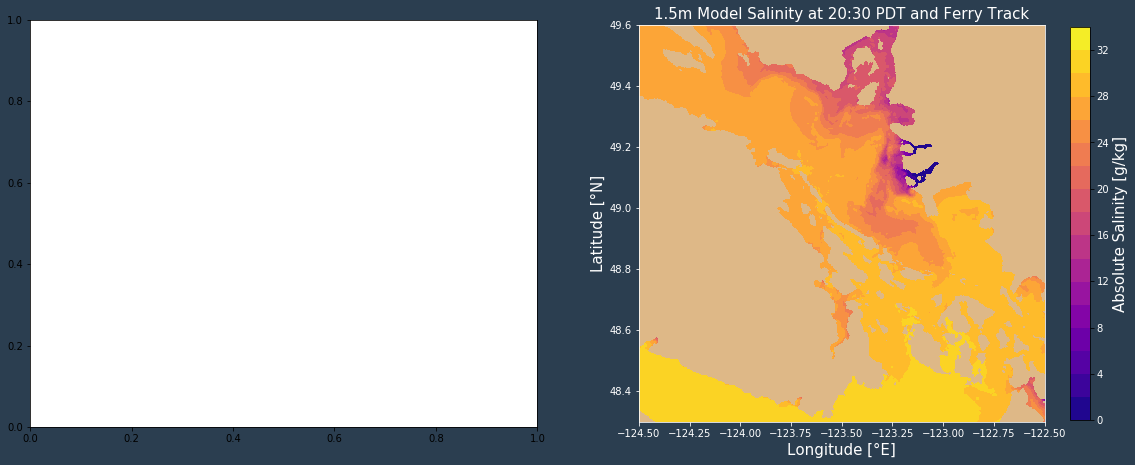

In [15]:
%%timeit -n1 -r1

# Refactored rendering of figure

from importlib import reload
from nowcast.figures import website_theme
reload(salinity_ferry_track)
reload(website_theme)

fig = salinity_ferry_track.make_figure(
    grid_T_hr,
    theme=website_theme)